Enter the length of the rod: 200
Enter the total time: 30
Enter the number of spatial steps: 10
Enter the number of time steps: 10
Enter the thermal diffusivity: 20
Enter the initial condition function (e.g., lambda x: np.sin(np.pi * x)): lambda x: np.cos(np.pi * x)


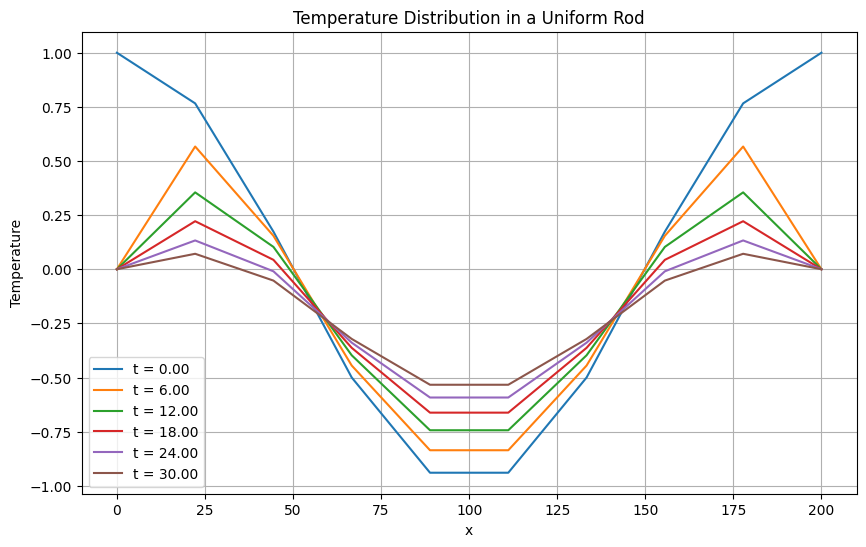

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def solve_heat_equation(L, T, Nx, Nt, alpha, initial_condition):
    """Solves the heat equation for a uniform rod using finite difference methods.

    Args:
        L (float): Length of the rod.
        T (float): Total time.
        Nx (int): Number of spatial steps.
        Nt (int): Number of time steps.
        alpha (float): Thermal diffusivity.
        initial_condition (function): Function defining the initial temperature distribution.

    Returns:
        tuple: 2D NumPy arrays representing the temperature distribution (u) and time (t).
    """
    dx = L / (Nx - 1)
    dt = T / Nt

    # Stability check
    if dt > dx**2 / (2 * alpha):
        raise ValueError("Unstable parameters. Choose smaller dt or larger dx.")

    x = np.linspace(0, L, Nx)
    t = np.linspace(0, T, Nt + 1)

    u = np.zeros((Nt + 1, Nx))
    u[0] = initial_condition(x)  # Set initial condition

    # Finite difference scheme
    for n in range(Nt):
        for i in range(1, Nx - 1):
            u[n + 1, i] = u[n, i] + alpha * dt / dx**2 * (u[n, i + 1] - 2 * u[n, i] + u[n, i - 1])

    return u, t

def get_user_input(prompt, input_type=float):
    """Get user input with validation."""
    while True:
        try:
            user_input = input_type(input(prompt))
            return user_input
        except ValueError:
            print("Invalid input. Please enter a valid value.")

def validate_initial_condition(initial_condition, L, Nx):
    """Validates the initial condition function."""
    try:
        x_test = np.linspace(0, L, Nx)  # Test with grid points
        initial_condition(x_test)
    except Exception as e:
        raise ValueError(f"Invalid initial condition function: {e}")

# Get user input for parameters
L = get_user_input("Enter the length of the rod: ")
T = get_user_input("Enter the total time: ")
Nx = get_user_input("Enter the number of spatial steps: ", int)
Nt = get_user_input("Enter the number of time steps: ", int)
alpha = get_user_input("Enter the thermal diffusivity: ")

initial_condition_str = input("Enter the initial condition function (e.g., lambda x: np.sin(np.pi * x)): ")
initial_condition = eval(initial_condition_str)
validate_initial_condition(initial_condition, L, Nx)

# Solve the heat equation and visualize results
u, t = solve_heat_equation(L, T, Nx, Nt, alpha, initial_condition)

plt.figure(figsize=(10, 6))
for n in range(0, Nt + 1, Nt // 4):  # Plot every fourth time step
    plt.plot(np.linspace(0, L, Nx), u[n], label=f't = {t[n]:.2f}')

plt.xlabel('x')
plt.ylabel('Temperature')
plt.title('Temperature Distribution in a Uniform Rod')
plt.legend()
plt.grid(True)
plt.show()